In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Ejercitación

¡Sí, seguimos trabajando con dados! Vamos a programar una serie de clases que nos servirán para modelar - muy simplificadamente - algunos fenómenos.

**Ejercicio 1:** crea una clase `Dado` cuyos atributos sean la cantidad de lados y la probabilidad asignada a cada lado. Algunas características que debe tener la clase:
* Debemos pasar la cantidad de lados cuando creamos una instancia. Por defecto deben ser seis.
* Cuando creamos una instancia, se debe asignar la misma probabilidad a cada lado (probabilidad uniforme).
* La clase debe contar con el método `tirar_dado`, que debe tomar como argumento la cantidad de veces que queremos tirar el dado.

Comprueba que la clase está correctamente programada crean un dados de distinto número de caras, tirando 100000 veces ese dado y haciendo un histograma de sus resultados. ¿Qué deberías obtener?

In [2]:
class Dado:
    def __init__(self, lados = 6, probabilidades = None):
        self.n_lados = lados
        if probabilidades and len(probabilidades) == lados and np.sum(probabilidades) == 1:
            self.probabilidades = probabilidades
        else:
            self.probabilidades = np.ones(lados)/lados
        
    def tirar_dado(self, numero_veces = 1):
        lados = np.arange(1,self.n_lados+1)
        return np.random.choice(lados, size = numero_veces, p=self.probabilidades)

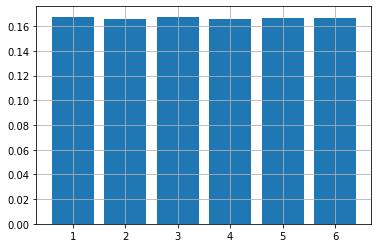

In [3]:
# COMPLETAR
dado = Dado(6)
plt.hist(dado.tirar_dado(100000), bins = np.arange(0.5, dado.n_lados + 1.5), label = 'Histrograma dados', density = True, rwidth = 0.8)
plt.grid()
plt.show()

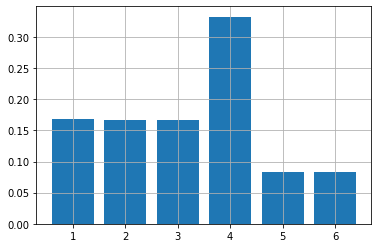

In [4]:
# COMPLETAR
dado2 = Dado(6, [1/6,1/6,1/6,2/6,1/12,1/12])
plt.hist(dado2.tirar_dado(100000), bins = np.arange(0.5, dado.n_lados + 1.5), label = 'Histrograma dados', density = True, rwidth = 0.8)
plt.grid()
plt.show()

**Ejercicio 2**

En el mundo de la publicidad, de las aplicaciones, las redes sociales, etc., suele ocurrir el siguiente fenómeno: a medida que más se hace conocido un producto, más probabilidad hay de que se siga comprando o consumiendo. A veces, esto se debe a recomendaciones de conocidos, mayor inversión en publicidad o simplemente el producto ya se convirtió en una marca establecida. Pero otras veces es el mismo producto el que requiere tener consumidores para aumentar su número de consumidores. Por ejemplo, pensemos en una red social. En general, nadie querrá pertenecer a una red social que no tiene usuarios. Y a medida que un mayor número de nuestros conocidos se suman a una red social, más probable es que nos sumemos nosotros. Esto también ocurre en otros ámbitos, ¿se te ocurre dónde?  

Un modelo muy inocente de esta situación es pensar que se trata de un dado que se va cargando teniendo en cuenta el histórico de sus resultados. Por ejemplo, si el tres salió muchas veces, esto hace que aumente la probabilidad de que en la próxima tirada salga tres. Pensando en las redes sociales, esto es equivalente a pensar que es más probable que se sumen nuevos usuarios a una red que ya tiene muchos usuarios.

Te dejamos programada una clase, `DadoCargado`, que intenta simular esta situación.
1. Lee detenidamente el código y trata de entendelo.
2. Crea una instancia de `DadoCargado`, tira el dado algunas veces e imprime en pantalla el resultado y las probabilidades. ¿Cómo se van modificando?
3. Crea una nueva instancia de `DadoCargado` y haz un gráfico de la evolución de la probabilidad en función del número de tiradas.
4. ¿Qué ocurre si modificas el valor de `premio`?¿Cambia el comportamiento?

In [5]:
class DadoCargado:
    def __init__(self, n_lados = 6, premio = 0.1):
        self.n_lados = n_lados
        self.probabilidades = np.ones(n_lados)/n_lados
        self.premio = premio
        self.resultados = []
        self.counts = np.zeros(n_lados)
        
    def tirar_dado(self):
        lados = np.arange(1,self.n_lados+1)
        resultados = np.random.choice(lados, 1, p = self.probabilidades)
        self.resultados +=list(resultados)
        self.counts[resultados[0] - 1] +=1
        self.cargar_dado()
        return resultados
    
    def cargar_dado(self):
        self.probabilidades = self.probabilidades + self.premio*self.counts/self.counts.sum()
        self.probabilidades = self.probabilidades/self.probabilidades.sum()

In [6]:
# COMPLETAR
dado = DadoCargado()
print(dado.probabilidades)
print(dado.counts)
for i in range(50):
    print(dado.tirar_dado())
    print(dado.resultados)
    print(dado.counts)
    print(dado.probabilidades)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[0. 0. 0. 0. 0. 0.]
[3]
[3]
[0. 0. 1. 0. 0. 0.]
[0.15151515 0.15151515 0.24242424 0.15151515 0.15151515 0.15151515]
[1]
[3, 1]
[1. 0. 1. 0. 0. 0.]
[0.18319559 0.13774105 0.26584022 0.13774105 0.13774105 0.13774105]
[1]
[3, 1, 1]
[2. 0. 1. 0. 0. 0.]
[0.22714751 0.12521913 0.27197596 0.12521913 0.12521913 0.12521913]
[4]
[3, 1, 1, 4]
[2. 0. 1. 1. 0. 0.]
[0.25195228 0.11383558 0.26997814 0.13656285 0.11383558 0.11383558]
[4]
[3, 1, 1, 4, 4]
[2. 0. 1. 2. 0. 0.]
[0.26541116 0.10348689 0.26361649 0.16051168 0.10348689 0.10348689]
[3]
[3, 1, 1, 4, 4, 3]
[2. 0. 2. 2. 0. 0.]
[0.27158591 0.09407899 0.26995439 0.17622274 0.09407899 0.09407899]
[4]
[3, 1, 1, 4, 4, 3, 4]
[2. 0. 2. 3. 0. 0.]
[0.2728703  0.08552635 0.27138711 0.19916353 0.08552635 0.08552635]
[1]
[3, 1, 1, 4, 4, 3, 4, 1]
[3. 0. 2. 3. 0. 0.]
[0.28215482 0.07775123 0.26944282 0.21514866 0.07775123 0.07775123]
[2]
[3, 1, 1, 4, 4, 3, 4, 1, 2]
[3. 1. 2. 3. 0. 0.]
[0.28680

In [7]:
# COMPLETAR
dado = DadoCargado()
lanzamientos = 5000
probabilidades = np.zeros((lanzamientos+1, dado.n_lados))
probabilidades[0,:] = dado.probabilidades
for tirada in range(lanzamientos):
    dado.tirar_dado()
    probabilidades[tirada+1,:] = dado.probabilidades

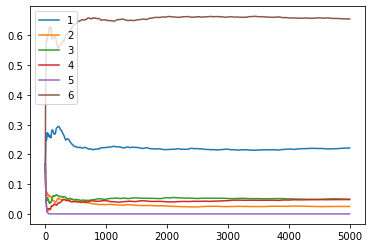

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[2.21796320e-001 2.50934262e-002 4.93841838e-002 4.82606123e-002
 1.81310501e-208 6.55465458e-001]


In [8]:
# COMPLETAR
for lado in range(dado.n_lados):
    plt.plot(np.arange(lanzamientos+1), probabilidades[:,lado], label = lado+1)
plt.legend()
plt.show()
print(probabilidades[0,:])
print(probabilidades[lanzamientos,:])

**Ejercicio 3**

Siguiendo con el ejemplo de las redes sociales, una vez que dejan de sumarse nuevos miembros a una red - la red pasa de moda - es probable que algunos miembros empiecen a darse de baja. Para incorporar esta situación al modelo, podemos incorporar dos nuevos atributos, `latencia` y `castigo`. Si un resultado no ocurre en un número determinado de tiradas (`latencia`) descontamos `castigo` de las cuentas correspondientes a ese resultado. De esta forma, a medida que pasa el tiempo sin nuevos miembros, disminuye la probabilidad que un miembro nuevo se sume.

Nuevamente, te dejamos una clase programada que intenta simular esta situación.
1. Lee detenidamente el código y trata de entendelo.
2. Crea una instancia de `DadoCargado`, tira el dado algunas veces e imprime en pantalla el resultado y las probabilidades. ¿Cómo se van modificando?
3. Crea una nueva instancia de `DadoCargado` y haz un gráfico de la evolución de la probabilidad en función del número de tiradas.
4. ¿Qué ocurre si modificas el valor de `premio`, `castigo` y `latencia`?¿Cambia el comportamiento?¿Cómo estudiarias ese comportamiento?

In [20]:
class DadoCargado:
    def __init__(self, n_lados = 6, premio = 0.2, castigo = 1, latencia = 10):
        self.n_lados = n_lados
        self.probabilidades = np.ones(n_lados)/n_lados
        self.premio = premio
        self.castigo = castigo
        self.latencia = latencia
        self.resultados = []
        self.counts = np.zeros(n_lados)
        
    def tirar_dado(self):
        lados = np.arange(1,self.n_lados+1)
        resultados = np.random.choice(lados, 1, p = self.probabilidades)
        self.resultados +=list(resultados)
        self.counts[resultados[0] - 1] +=1
        self.cargar_dado()
        return resultados
    
    def cargar_dado(self):
        if len(self.resultados) >= self.latencia:
            lados = np.arange(1,self.n_lados+1)
            for lado in lados:
                if lado not in self.resultados[-self.latencia:]:
                    self.counts[lado - 1] -= self.castigo
                    if self.counts[lado - 1]<0:
                        self.counts[lado - 1] = 0
                        
        self.probabilidades = self.probabilidades + self.premio*self.counts/self.counts.sum()
        self.probabilidades = self.probabilidades/self.probabilidades.sum()

In [21]:
# COMPLETAR
dado = DadoCargado()
print(dado.probabilidades)
print(dado.counts)
for i in range(50):
    print(dado.tirar_dado())
    print(dado.resultados)
    print(dado.counts)
    print(dado.probabilidades)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[0. 0. 0. 0. 0. 0.]
[2]
[2]
[0. 1. 0. 0. 0. 0.]
[0.13888889 0.30555556 0.13888889 0.13888889 0.13888889 0.13888889]
[5]
[2, 5]
[0. 1. 0. 0. 1. 0.]
[0.11574074 0.33796296 0.11574074 0.11574074 0.19907407 0.11574074]
[2]
[2, 5, 2]
[0. 2. 0. 0. 1. 0.]
[0.09645062 0.39274691 0.09645062 0.09645062 0.22145062 0.09645062]
[2]
[2, 5, 2, 2]
[0. 3. 0. 0. 1. 0.]
[0.08037551 0.45228909 0.08037551 0.08037551 0.22620885 0.08037551]
[3]
[2, 5, 2, 2, 3]
[0. 3. 1. 0. 1. 0.]
[0.0669796  0.47690758 0.10031293 0.0669796  0.22184071 0.0669796 ]
[2]
[2, 5, 2, 2, 3, 2]
[0. 4. 1. 0. 1. 0.]
[0.05581633 0.50853409 0.11137189 0.05581633 0.21264503 0.05581633]
[2]
[2, 5, 2, 2, 3, 2, 2]
[0. 5. 1. 0. 1. 0.]
[0.04651361 0.54282603 0.11661943 0.04651361 0.20101372 0.04651361]
[5]
[2, 5, 2, 2, 3, 2, 2, 5]
[0. 5. 1. 0. 2. 0.]
[0.03876134 0.55652169 0.11801619 0.03876134 0.2091781  0.03876134]
[2]
[2, 5, 2, 2, 3, 2, 2, 5, 2]
[0. 6. 1. 0. 2. 0.]
[0.03230

In [18]:
# COMPLETAR
dado = DadoCargado()
lanzamientos = 5000
probabilidades = np.zeros((lanzamientos+1, dado.n_lados))
probabilidades[0,:] = dado.probabilidades
for tirada in range(lanzamientos):
    dado.tirar_dado()
    probabilidades[tirada+1,:] = dado.probabilidades

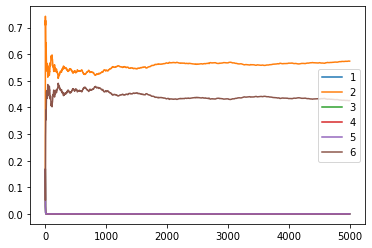

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[4.94065646e-324 5.73995716e-001 4.94065646e-324 4.94065646e-324
 4.94065646e-324 4.26004284e-001]


In [22]:
# COMPLETAR
for lado in range(dado.n_lados):
    plt.plot(np.arange(lanzamientos+1), probabilidades[:,lado], label = lado+1)
plt.legend()
plt.show()
print(probabilidades[0,:])
print(probabilidades[lanzamientos,:])

**Extra**

Juega con estos modelos. Hazles preguntas e intenta responderlas. Por ejemplo, puedes ver que en todos los casos suele haber un lado exitoso que, luego de algunas tiradas, se establece como el lado más probable. Además, en el modelo del ejercicio 3, existen lados cuyas probabilidades caen a cero. ¿En qué momemento se decide cuál es el lado exitoso?¿El que sale primero?¿El que sale más veces en las primeras diez tiradas?¿Cuál será un buen predictor de esta situación?¿Y con los lados cuya probabilidad cae a cero?¿Cuándo se decide su destino?